In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
# Reading  the Dataset

In [3]:
df = pd.read_csv('Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df 

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [6]:
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

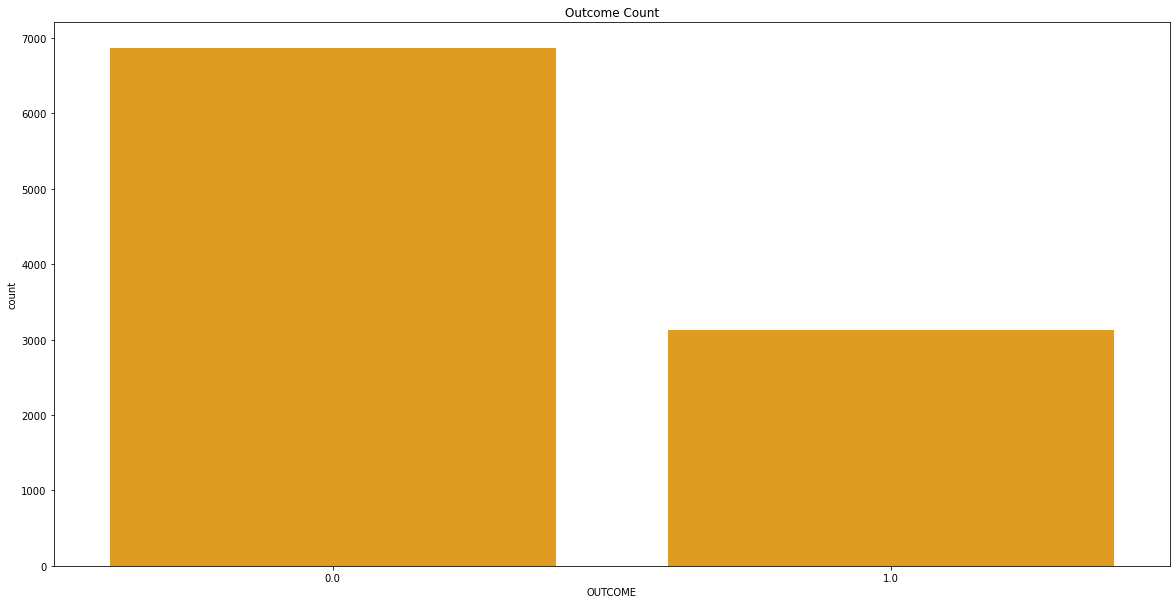

In [7]:
plt.figure(figsize=(20,10))
plt.title('Outcome Count')
sns.countplot(data=df, x ='OUTCOME',color='orange');

from the count, we can see that the data is in-balanced.

In [8]:
df['AGE'].value_counts()

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

<AxesSubplot:title={'center':'Age Count'}, xlabel='AGE', ylabel='count'>

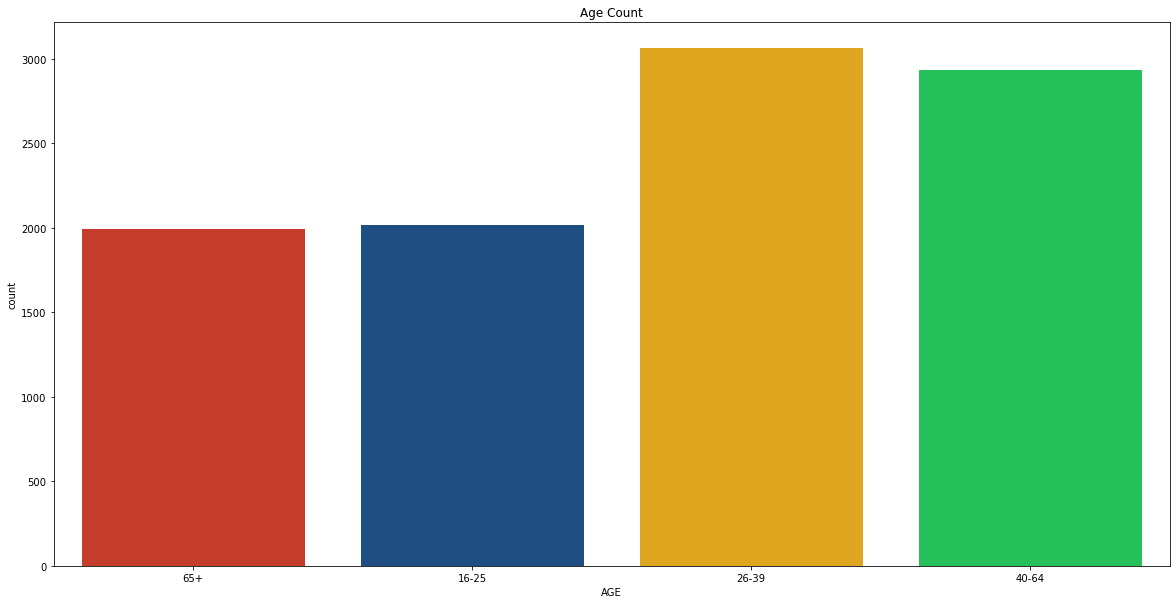

In [9]:
plt.figure(figsize=(20,10))
plt.title('Age Count')
sns.countplot(data=df, x ='AGE',palette=['#de2910',"#0f4d92","#ffb300","#0bda51"])

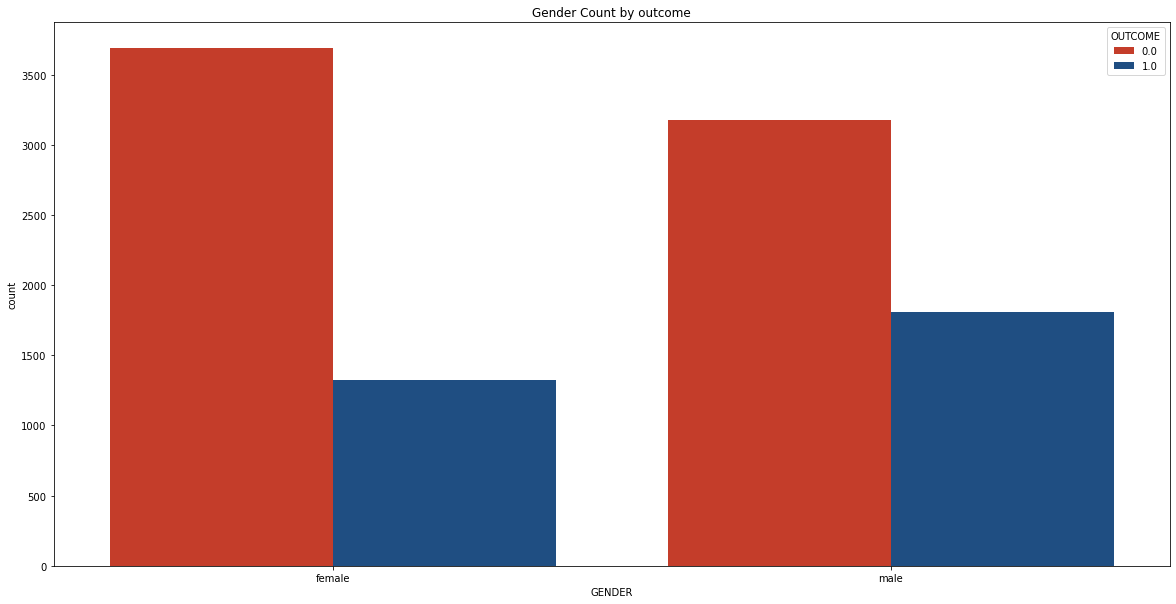

In [10]:
plt.figure(figsize=(20,10))
plt.title('Gender Count by outcome')
sns.countplot(data=df, x ='GENDER', hue='OUTCOME',palette=["#de2910","#0f4d92"]);

<AxesSubplot:title={'center':'Driving Experience Count color by outcome'}, xlabel='DRIVING_EXPERIENCE', ylabel='count'>

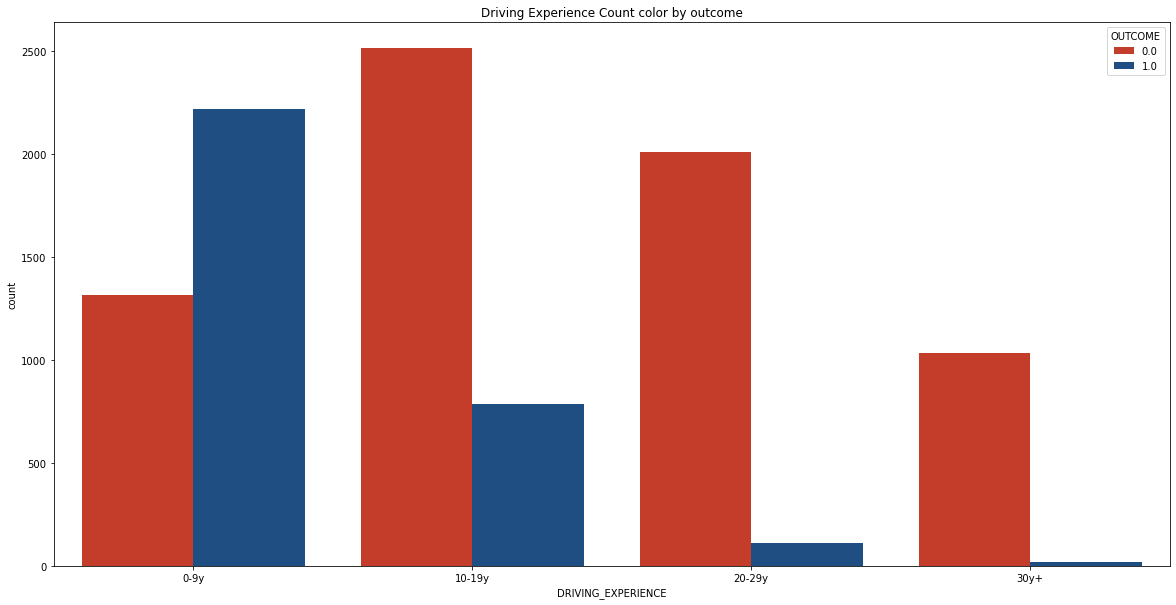

In [11]:
plt.figure(figsize=(20,10))
plt.title('Driving Experience Count color by outcome')
sns.countplot(data=df, x ='DRIVING_EXPERIENCE', hue='OUTCOME',palette=["#de2910","#0f4d92"])

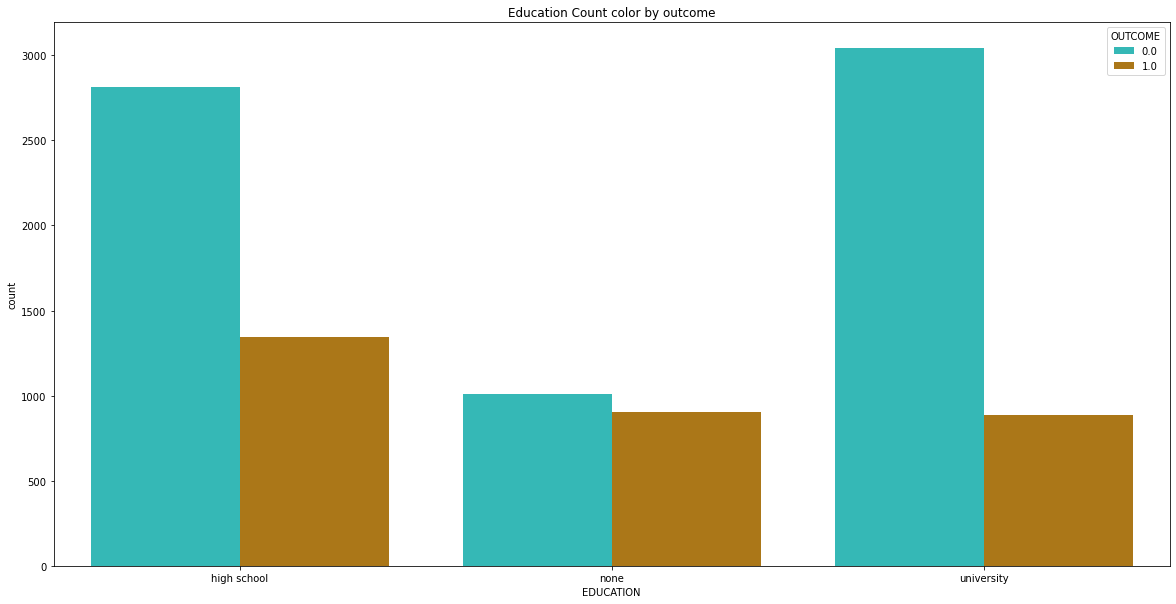

In [12]:
plt.figure(figsize=(20,10))
plt.title('Education Count color by outcome')
sns.countplot(data=df, x ='EDUCATION', hue='OUTCOME',palette=["#1fcecb","#c37e00"]);

<AxesSubplot:title={'center':'Income Count color by outcome'}, xlabel='INCOME', ylabel='count'>

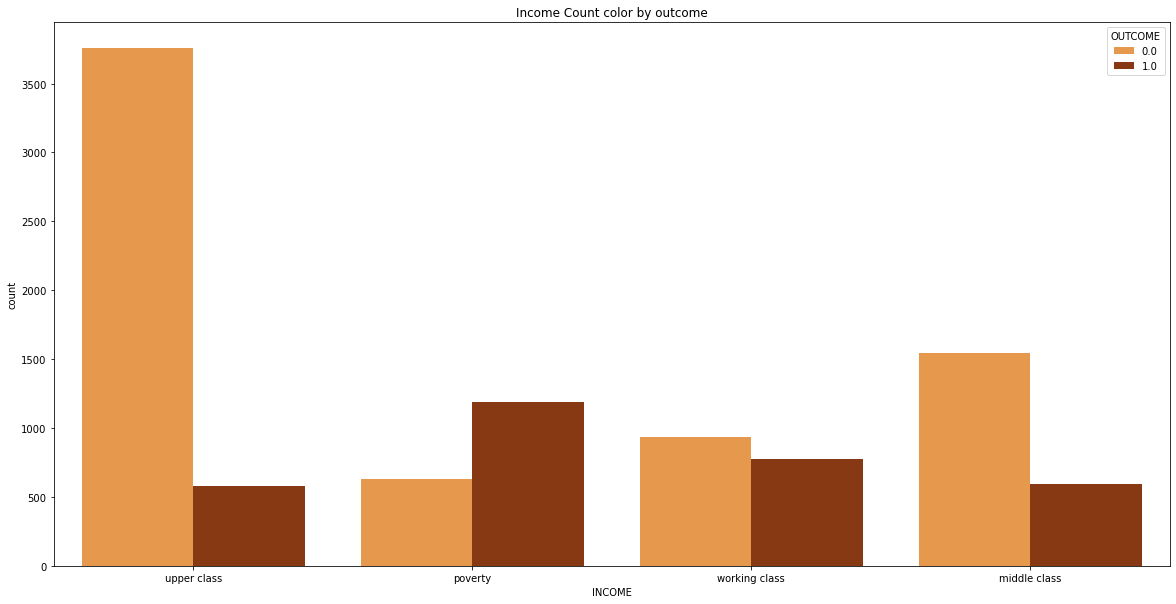

In [13]:
plt.figure(figsize=(20,10))
plt.title('Income Count color by outcome')
sns.countplot(data=df, x ='INCOME', hue='OUTCOME',palette=["#ff9933","#993300"])

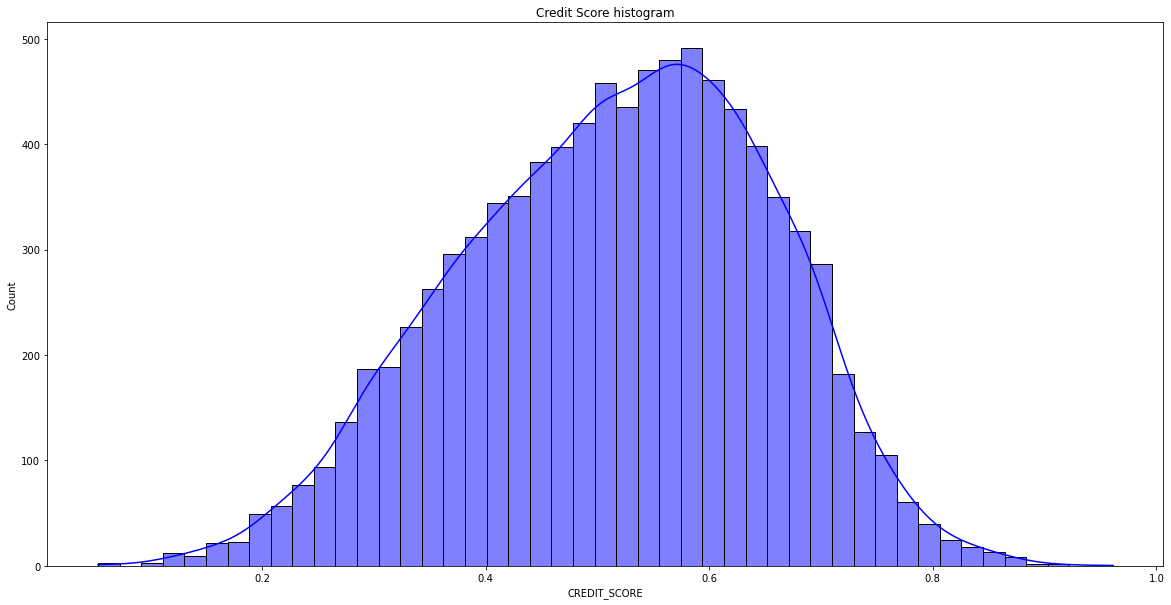

In [14]:
plt.figure(figsize=(20,10))
plt.title('Credit Score histogram')
sns.histplot(data=df, x='CREDIT_SCORE', kde=True,color="blue");

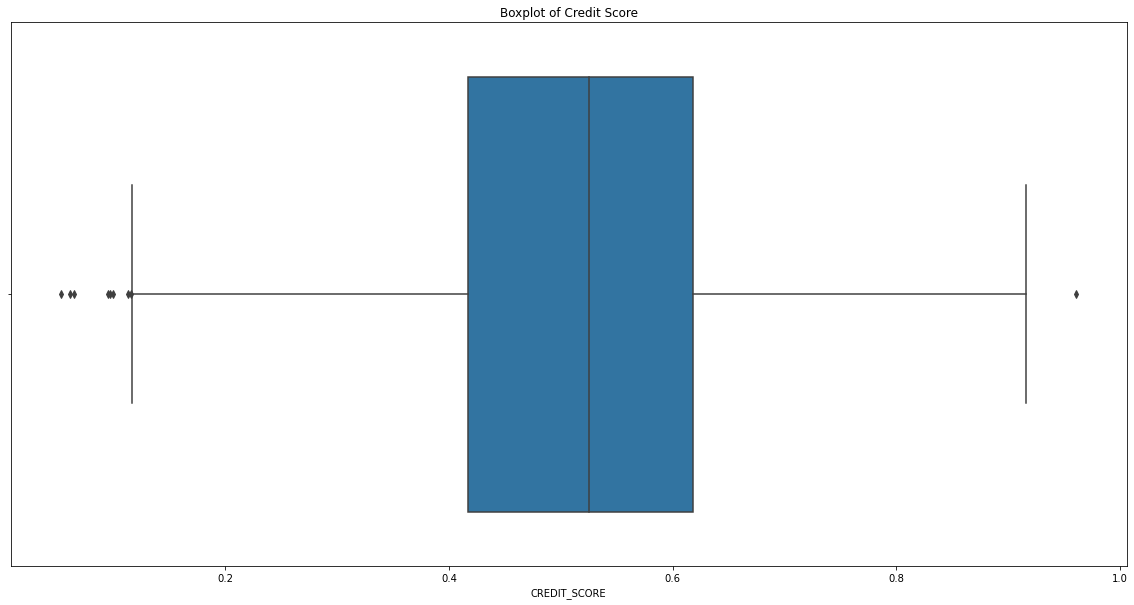

In [15]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Credit Score')
sns.boxplot(data=df, x='CREDIT_SCORE');

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

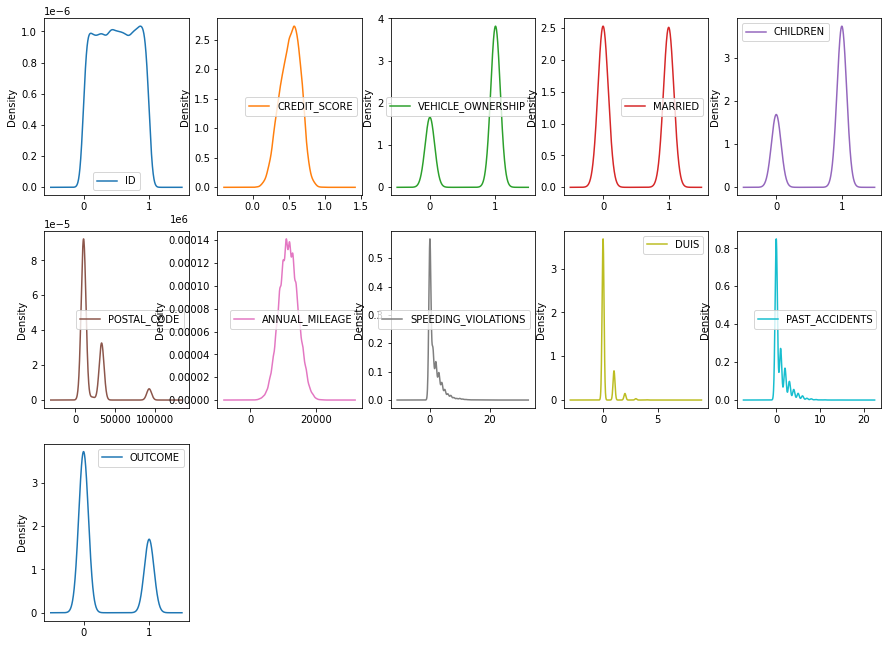

In [16]:
df.plot(kind="density", layout=(4,5),subplots=True, figsize=(15,15), sharex=False)

In [17]:
df[df['CREDIT_SCORE']<0.1]

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
2152,255200,16-25,female,majority,0-9y,none,poverty,0.053358,0.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,1.0
4955,237974,16-25,male,majority,0-9y,none,poverty,0.064810,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
6031,963384,16-25,male,majority,0-9y,high school,poverty,0.060867,1.0,before 2015,0.0,0.0,10238,12000.0,sedan,0,0,0,1.0
6752,834276,26-39,female,majority,10-19y,high school,poverty,0.099655,1.0,after 2015,0.0,0.0,10238,13000.0,sedan,1,0,1,0.0
8039,214281,26-39,male,majority,10-19y,none,poverty,0.095387,1.0,before 2015,0.0,0.0,10238,15000.0,sedan,2,1,2,1.0
8194,236191,16-25,male,majority,0-9y,none,poverty,0.097211,0.0,before 2015,0.0,0.0,10238,17000.0,sedan,0,0,0,1.0


In [18]:
df[df['CREDIT_SCORE']>0.9]

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
4552,224416,26-39,female,majority,10-19y,high school,upper class,0.915883,1.0,after 2015,0.0,0.0,32765,8000.0,sedan,1,0,0,0.0
7816,618914,65+,female,majority,10-19y,university,upper class,0.914117,1.0,before 2015,1.0,1.0,10238,7000.0,sedan,0,0,0,0.0
8057,825288,40-64,male,majority,10-19y,university,upper class,0.960819,1.0,after 2015,0.0,1.0,10238,10000.0,sedan,1,0,1,0.0


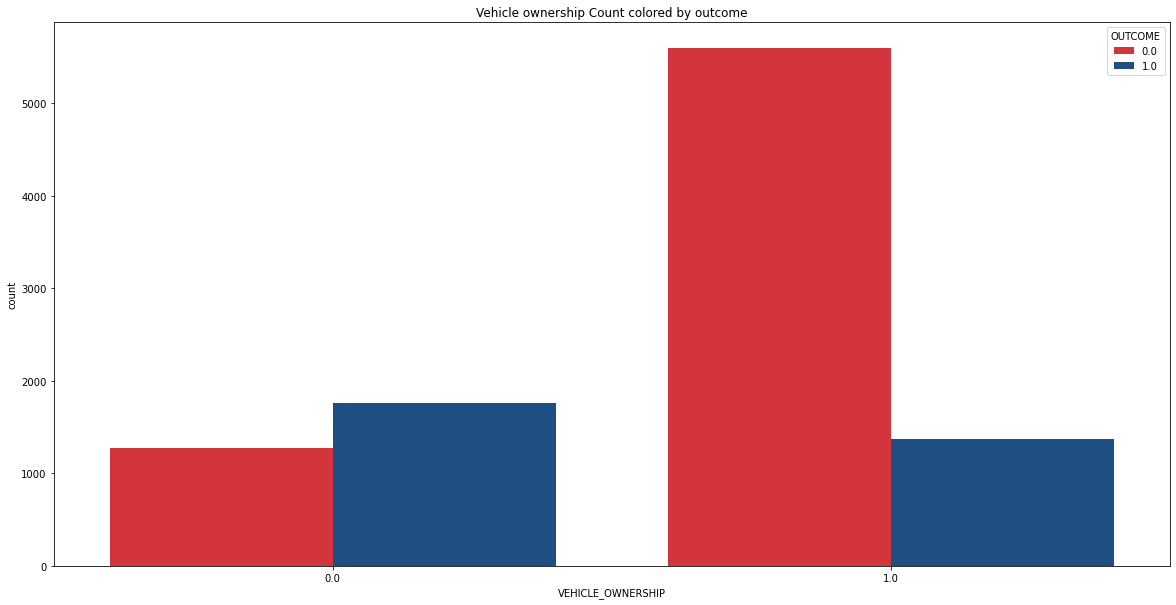

In [19]:
plt.figure(figsize=(20,10))
plt.title('Vehicle ownership Count colored by outcome')
sns.countplot(data=df, x='VEHICLE_OWNERSHIP', hue='OUTCOME',palette=["#ec1c24","#0f4d92"]);

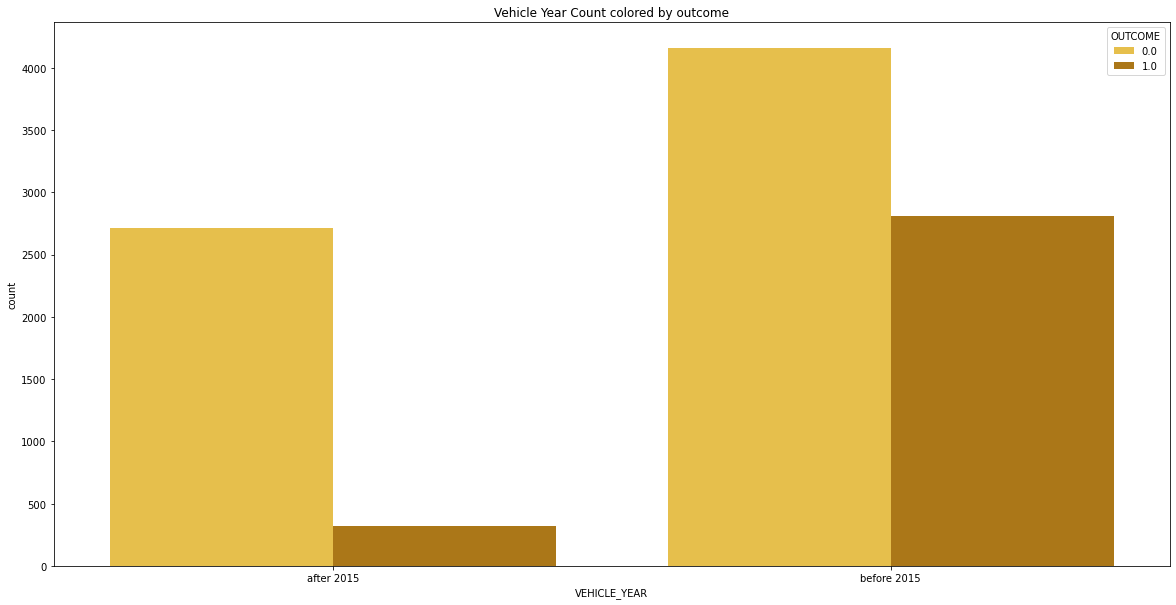

In [20]:
plt.figure(figsize=(20,10))
plt.title('Vehicle Year Count colored by outcome')
sns.countplot(data=df, x='VEHICLE_YEAR', hue='OUTCOME',palette=["#ffcc33","#c37e00"]);

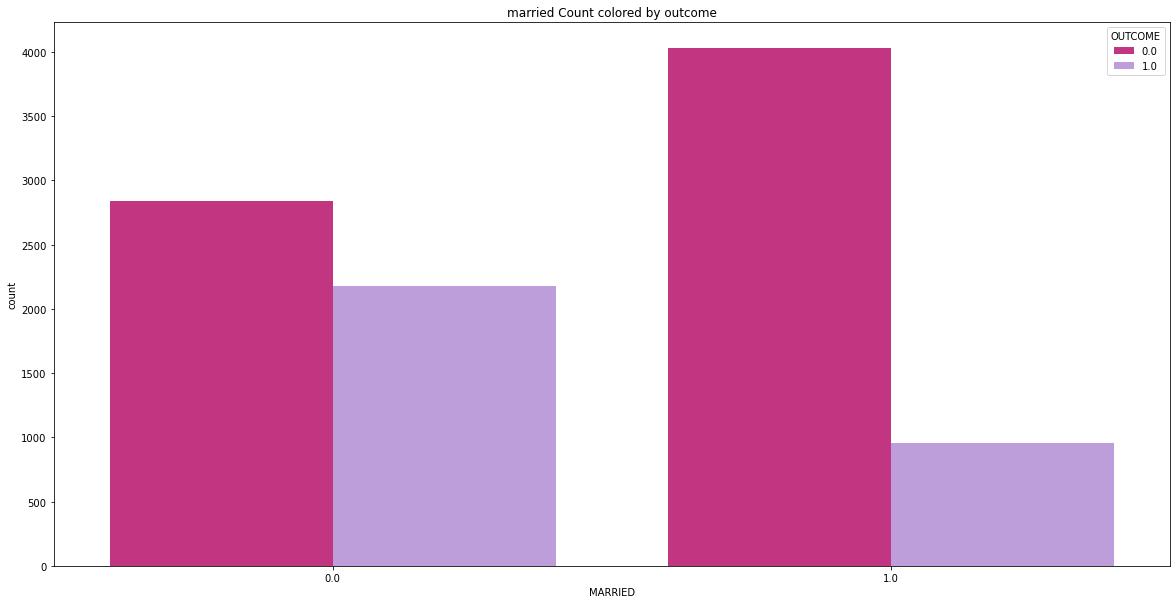

In [21]:
plt.figure(figsize=(20,10))
plt.title('married Count colored by outcome')
sns.countplot(data=df, x='MARRIED', hue='OUTCOME',palette=["#da1d81","#bf94e4"]);


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

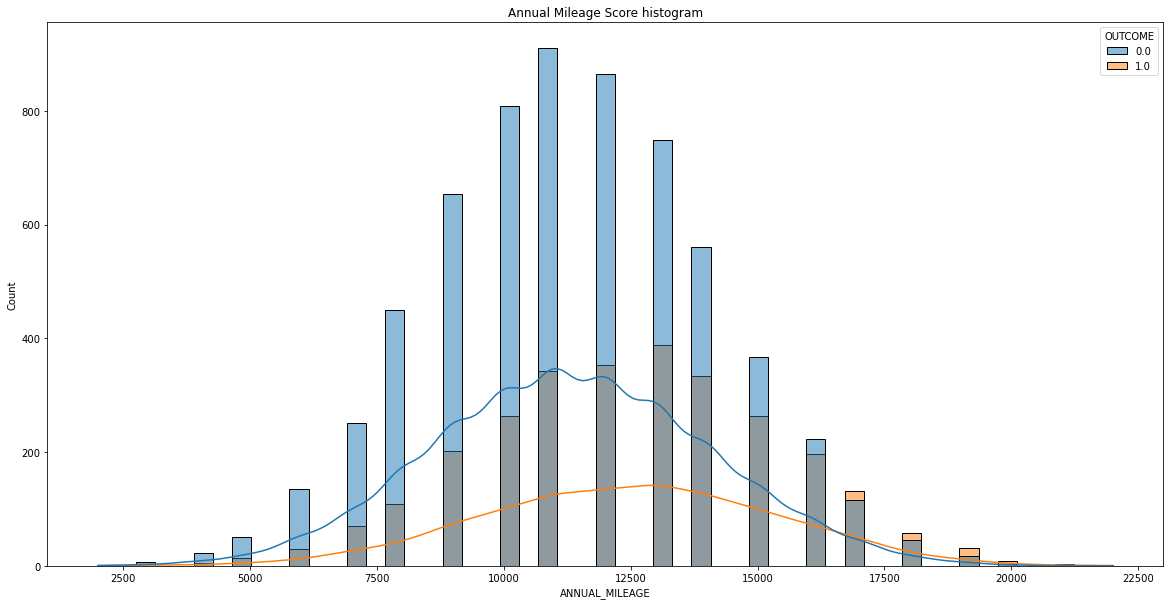

In [23]:
plt.figure(figsize=(20,10))
plt.title('Annual Mileage Score histogram')
sns.histplot(data=df, x='ANNUAL_MILEAGE',hue='OUTCOME', kde=True,color='yellow');

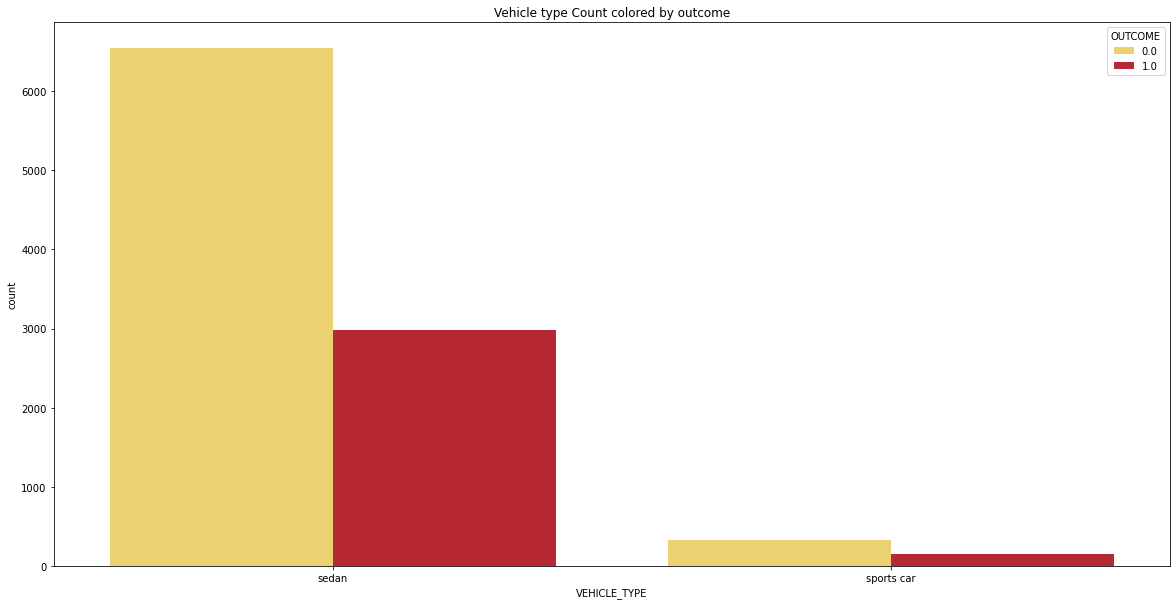

In [24]:
plt.figure(figsize=(20,10))
plt.title('Vehicle type Count colored by outcome')
sns.countplot(data=df, x='VEHICLE_TYPE', hue='OUTCOME',palette=["#ffdc5d","#cf1020"]);

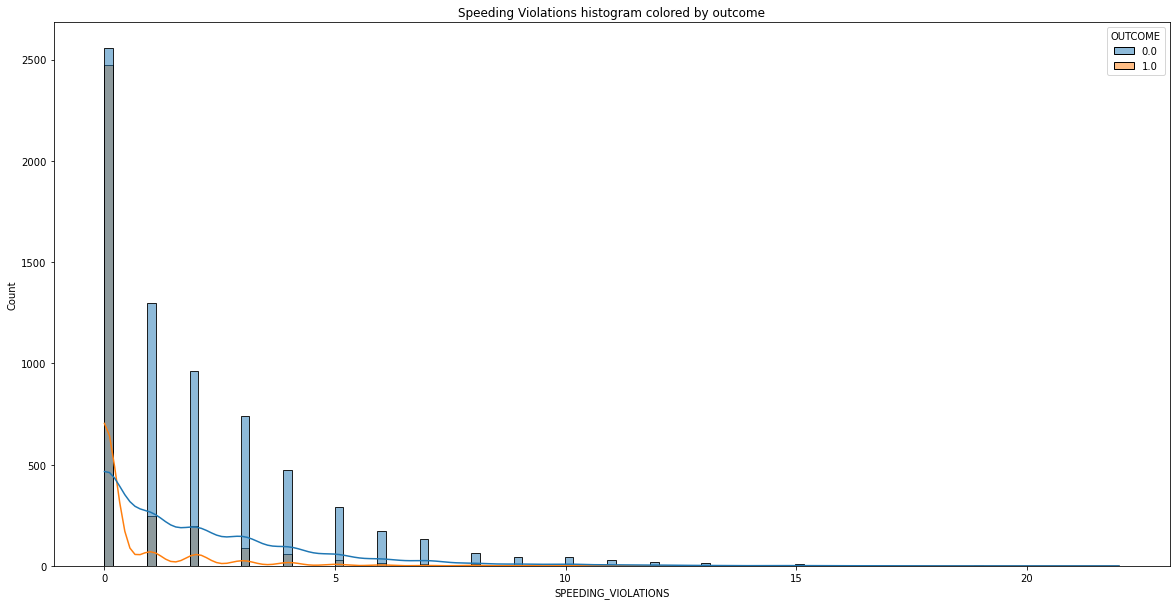

In [25]:
plt.figure(figsize=(20,10))
plt.title('Speeding Violations histogram colored by outcome')
sns.histplot(data=df, x='SPEEDING_VIOLATIONS',hue='OUTCOME', kde=True);

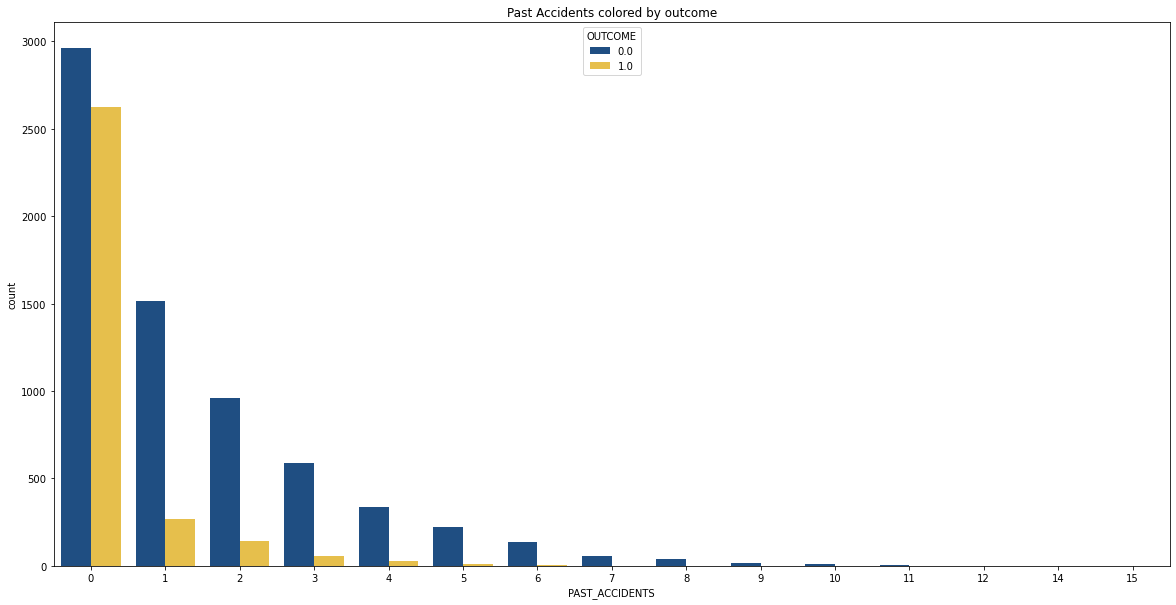

In [26]:
plt.figure(figsize=(20,10))
plt.title('Past Accidents colored by outcome')
sns.countplot(data=df, x='PAST_ACCIDENTS',hue='OUTCOME',palette=["#0f4d92","#ffcc33"]);

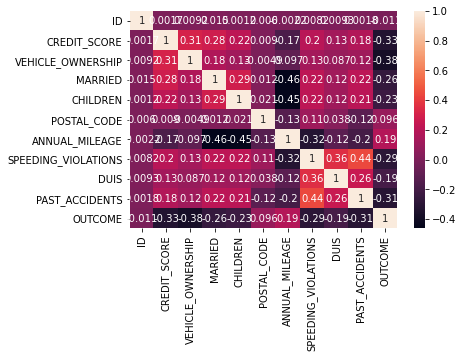

In [27]:
#ploting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [29]:
df['INCOME'].value_counts()

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

In [30]:
upper_class_median = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].median()
middle_class_median = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].median()
poverty_class_median = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].median()
working_class_median = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].median()

In [31]:
df.loc[(df[(df['INCOME'] == 'working class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].fillna(working_class_median)
df.loc[(df[(df['INCOME'] == 'poverty') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].fillna(poverty_class_median)
df.loc[(df[(df['INCOME'] == 'middle class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].fillna(middle_class_median)
df.loc[(df[(df['INCOME'] == 'upper class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].fillna(upper_class_median)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [33]:
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [35]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515429,0.697000,0.498200,0.688800,19864.548400,11726.000000,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.134677,0.459578,0.500022,0.463008,18915.613855,2681.649329,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.421301,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.526747,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.616289,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [36]:
df.nunique()

ID                     10000
AGE                        4
GENDER                     2
RACE                       2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE            9020
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE                4
ANNUAL_MILEAGE            21
VEHICLE_TYPE               2
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            15
OUTCOME                    2
dtype: int64

In [37]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [38]:
cols=["AGE","GENDER","RACE","DRIVING_EXPERIENCE","EDUCATION","INCOME","VEHICLE_OWNERSHIP","VEHICLE_YEAR","MARRIED","CHILDREN","POSTAL_CODE","VEHICLE_TYPE","OUTCOME"]

In [39]:
le=preprocessing.LabelEncoder()
for i in cols:
    df[i]=le.fit_transform(df[i])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  int32  
 2   GENDER               10000 non-null  int32  
 3   RACE                 10000 non-null  int32  
 4   DRIVING_EXPERIENCE   10000 non-null  int32  
 5   EDUCATION            10000 non-null  int32  
 6   INCOME               10000 non-null  int32  
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  int32  
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  int32  
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [41]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,3,0,0,0,0,2,0.629027,1,0,0,1,0,12000.0,0,0,0,0,0
1,750365,0,1,0,0,1,1,0.357757,0,1,0,0,0,16000.0,0,0,0,0,1
2,199901,0,0,0,0,0,3,0.493146,1,1,0,0,0,11000.0,0,0,0,0,0
3,478866,0,1,0,0,2,3,0.206013,1,1,0,1,2,11000.0,0,0,0,0,0
4,731664,1,1,0,1,1,3,0.388366,1,1,0,0,2,12000.0,0,2,0,1,1


In [42]:
df.drop(["ID"],inplace=True,axis=1)

In [43]:
min_max_sca=preprocessing.MinMaxScaler()
cols=["CREDIT_SCORE","ANNUAL_MILEAGE"]
df1=df.copy()
min_max_sca.fit(df1)
df1=min_max_sca.transform(df1)
df1=pd.DataFrame(df1,columns=df.columns)
df1.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,1.000000,0.0,0.0,0.000000,0.0,0.666667,0.634374,1.0,0.0,0.0,1.0,0.000000,0.50,0.0,0.000000,0.0,0.000000,0.0
1,0.000000,1.0,0.0,0.000000,0.5,0.333333,0.335441,0.0,1.0,0.0,0.0,0.000000,0.70,0.0,0.000000,0.0,0.000000,1.0
2,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.484636,1.0,1.0,0.0,0.0,0.000000,0.45,0.0,0.000000,0.0,0.000000,0.0
3,0.000000,1.0,0.0,0.000000,1.0,1.000000,0.168222,1.0,1.0,0.0,1.0,0.666667,0.45,0.0,0.000000,0.0,0.000000,0.0
4,0.333333,1.0,0.0,0.333333,0.5,1.000000,0.369171,1.0,1.0,0.0,0.0,0.666667,0.50,0.0,0.090909,0.0,0.066667,1.0


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  float64
 1   GENDER               10000 non-null  float64
 2   RACE                 10000 non-null  float64
 3   DRIVING_EXPERIENCE   10000 non-null  float64
 4   EDUCATION            10000 non-null  float64
 5   INCOME               10000 non-null  float64
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  float64
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  float64
 12  ANNUAL_MILEAGE       10000 non-null  float64
 13  VEHICLE_TYPE         10000 non-null  float64
 14  SPEEDING_VIOLATIONS  10000 non-null  float64
 15  DUIS                 10000 non-null  

# REVIEW-2

# Modelling

In [45]:
X = df.drop(['OUTCOME'], axis=1)
y = df['OUTCOME']
X = pd.get_dummies(X, drop_first=True)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [50]:
from warnings import filterwarnings
filterwarnings('ignore')

In [51]:
from sklearn.metrics import classification_report,precision_score, recall_score,f1_score

In [54]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    model_recall = {}
    model_f1 = {}
    model_precision = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_preds = model.predict(X_test)
        print(name)
        print(classification_report(y_test, y_preds))
        print('\n')
        model_scores[name] = model.score(X_test,y_test)
        model_recall[name] = recall_score(y_test, y_preds)
        model_f1[name] = f1_score(y_test, y_preds)
        model_precision[name] = precision_score(y_test, y_preds)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    model_recall = pd.DataFrame(model_recall, index=['Recall']).transpose()
    model_recall = model_recall.sort_values('Recall')
    model_f1 = pd.DataFrame(model_f1, index=['F1']).transpose()
    model_f1 = model_f1.sort_values('F1')
    model_precision = pd.DataFrame(model_precision, index=['Precision']).transpose()
    model_precision = model_precision.sort_values('Precision')
       
    return model_scores, model_recall, model_f1, model_precision

In [53]:
models = {
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(objective='binary:logistic',eval_metric=['logloss']),
        'LGBMClassifier':LGBMClassifier()
          }

In [55]:
model_scores, model_recall, model_f1, model_precision = fit_and_score(models, X_train, X_test, y_train, y_test)

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2063
           1       0.78      0.68      0.73       937

    accuracy                           0.84      3000
   macro avg       0.82      0.80      0.81      3000
weighted avg       0.84      0.84      0.84      3000



GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2063
           1       0.78      0.73      0.75       937

    accuracy                           0.85      3000
   macro avg       0.83      0.82      0.82      3000
weighted avg       0.85      0.85      0.85      3000



XGBClassifier
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2063
           1       0.75      0.74      0.75       937

    accuracy                           0.84      3000
   macro avg       0.82      0.81      0.82      3000
weighted a

In [58]:
model_scores

,Score
AdaBoostClassifier,0.841333
XGBClassifier,0.842667
GradientBoostingClassifier,0.850333
LGBMClassifier,0.851667


In [57]:
model_recall

,Recall
AdaBoostClassifier,0.681964
GradientBoostingClassifier,0.728922
XGBClassifier,0.736393
LGBMClassifier,0.772679


In [59]:
model_f1

,F1
AdaBoostClassifier,0.728620
XGBClassifier,0.745140
GradientBoostingClassifier,0.752617
LGBMClassifier,0.764923


In [60]:
model_precision

,Precision
XGBClassifier,0.754098
LGBMClassifier,0.757322
GradientBoostingClassifier,0.777904
AdaBoostClassifier,0.782130


Since the labels are in-balanced, We will choose to use the LGBMClassifier as it provides the best overall scores. we will do a Randome Search CV to find the optimized hyper parameters

# Random Search CV

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                     param_distributions=params[name],
                                      scoring='f1',
                                      cv=5,
                                     n_iter=40,
                                     verbose=0)        
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        y_preds = rs_model.predict(X_test)
        print('\n')
        print(name)
        print(classification_report(y_test, y_preds))
        print('\n')
        
        
    return model_rs_scores, model_rs_best_param

In [63]:
models = {'LGBMClassifier': LGBMClassifier()}

params = {'LGBMClassifier':{}}

In [64]:
model_rs_scores_base, model_rs_best_param_base = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)



LGBMClassifier
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2063
           1       0.76      0.77      0.76       937

    accuracy                           0.85      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.85      0.85      0.85      3000





 # RS Model 

In [75]:
params = {'LGBMClassifier':{'num_leaves': np.arange(21,42,2),
                           'learning_rate': np.linspace(0.1,0.9,9),
                            'n_estimators':[50,100,200,300,500],
                            'min_split_gain':np.linspace(0.0,0.9,10),
                            'min_child_weight':np.linspace(0.0,0.9,10),
                            'min_child_samples': [10,20,40,80,100],
                            'reg_alpha': np.linspace(0.0,0.9,10),
                            'reg_lambda': np.linspace(0.0,0.9,10)
                           }
         }

In [77]:
model_rs_scores1, model_rs_best_param1 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)




LGBMClassifier
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2063
           1       0.76      0.76      0.76       937

    accuracy                           0.85      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.85      0.85      0.85      3000





# Model Evalution

In [65]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score

In [66]:
model = LGBMClassifier(reg_lambda = 1.6,
                      reg_alpha = 0.5333333333333333,
                      num_leaves = 41,
                      n_estimators = 300,
                      min_split_gain = 0.8555555555555556,
                      min_child_weight = 0.05555555555555556,
                      min_child_samples = 5,
                      learning_rate = 0.05)

In [67]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Classification output

In [68]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2063
           1       0.77      0.77      0.77       937

    accuracy                           0.86      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.86      0.86      0.86      3000



# Confusion Matirx

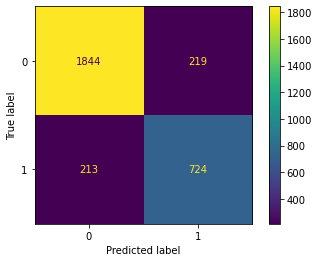

In [69]:
plot_confusion_matrix(model, X_test,y_test)

# ROC Curve

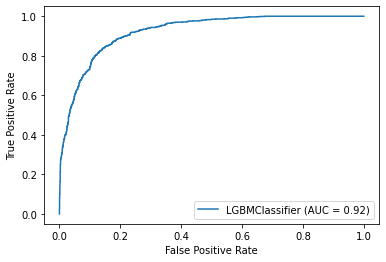

In [70]:
plot_roc_curve(model, X_test,y_test)

In [71]:
def get_cv_score(model, X, y, cv=5):
    
    
    cv_accuracy = cross_val_score(model,X,y,cv=cv,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(model,X,y,cv=cv,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(model,X,y,cv=cv,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(model,X,y,cv=cv,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics

In [72]:
cv_merics = get_cv_score(model, X_train, y_train, cv=5)

Cross Validaion accuracy Scores: [0.83785714 0.84857143 0.85714286 0.84857143 0.85071429]
Cross Validation accuracy Mean Score: 0.8485714285714285
Cross Validaion precision Scores: [0.73245614 0.75854214 0.78384798 0.74945055 0.75496689]
Cross Validation precision Mean Score: 0.7558527398892676
Cross Validaion recall Scores: [0.76082005 0.75854214 0.75170843 0.77676538 0.77727273]
Cross Validation recall Mean Score: 0.765021743632222
Cross Validaion f1 Scores: [0.74636872 0.75854214 0.76744186 0.76286353 0.76595745]
Cross Validation f1 Mean Score: 0.7602347396526218


In [73]:
cv_merics

,Accuracy,Precision,Recall,f1
0,0.848571,0.755853,0.765022,0.765022


 # Experimentation / Improvements

1. Check for other outliers? or other ways to fill nan values? or dropping the nan instead of filling them?
2. Build and looking in to the dataset again to build a better model
3. Getting more data to balance out the labels?